# Scikit-learn basics with osteoporosis prediction model

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("osteoporosis.csv")
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [3]:
df.dtypes

Id                      int64
Age                     int64
Gender                 object
Hormonal Changes       object
Family History         object
Race/Ethnicity         object
Body Weight            object
Calcium Intake         object
Vitamin D Intake       object
Physical Activity      object
Smoking                object
Alcohol Consumption    object
Medical Conditions     object
Medications            object
Prior Fractures        object
Osteoporosis            int64
dtype: object

In [4]:
[df[k].unique() for k in df[df.select_dtypes("object").columns].columns] # checking NaN values

[array(['Female', 'Male'], dtype=object),
 array(['Normal', 'Postmenopausal'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Asian', 'Caucasian', 'African American'], dtype=object),
 array(['Underweight', 'Normal'], dtype=object),
 array(['Low', 'Adequate'], dtype=object),
 array(['Sufficient', 'Insufficient'], dtype=object),
 array(['Sedentary', 'Active'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Moderate', nan], dtype=object),
 array(['Rheumatoid Arthritis', nan, 'Hyperthyroidism'], dtype=object),
 array(['Corticosteroids', nan], dtype=object),
 array(['Yes', 'No'], dtype=object)]

### Needs to fill empty data in "Prior Fractures", "Medications" and "Medical Conditions"

In [5]:
df.shape

(1958, 16)

In [6]:
df.drop(axis=1, labels="Id", inplace=True) # id is unique, we dont need it in model
df["Prior Fractures"] = df["Prior Fractures"].fillna(0)
df["Medications"] = df["Medications"].fillna(0)
df["Medical Conditions"] = df["Medical Conditions"].fillna(0)

### Will use Logistic Regression for this model due to binary nature of results

In [7]:
# Datasets
X = df.drop(axis=1, labels=["Osteoporosis"])
y = df["Osteoporosis"]

In [8]:
X_encoded = pd.get_dummies(X, columns=X.select_dtypes("object").columns) # one-hot encoding!

In [9]:
X_encoded.head()

,Age,Gender_Female,Gender_Male,Hormonal Changes_Normal,Hormonal Changes_Postmenopausal,Family History_No,Family History_Yes,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,...,Smoking_No,Smoking_Yes,Alcohol Consumption_Moderate,Medical Conditions_0,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_0,Medications_Corticosteroids,Prior Fractures_No,Prior Fractures_Yes
0,69,True,False,True,False,False,True,False,True,False,...,False,True,True,False,False,True,False,True,False,True
1,32,True,False,True,False,False,True,False,True,False,...,True,False,False,True,False,False,True,False,False,True
2,89,True,False,False,True,True,False,False,False,True,...,True,False,True,False,True,False,False,True,True,False
3,78,True,False,True,False,True,False,False,False,True,...,False,True,False,False,False,True,False,True,True,False
4,38,False,True,False,True,False,True,True,False,False,...,False,True,False,False,False,True,True,False,False,True


### Model implementation

In [10]:
import matplotlib.pylab as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
print(sum(y)/len(y))

# Creating default model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

0.5


In [12]:
# checking for ammount of data in both datasets
print(len(y_train)/sum(y_train))
print(len(y_test)/sum(y_test))

2.0
2.0


In [13]:
mod = LogisticRegression().fit(X_train, y_train)

In [14]:
from sklearn.model_selection import GridSearchCV

# testing model params
param_grid = {
    'fit_intercept': [True, False],
}

# model searching with 5 cross-validations
mod = GridSearchCV(
    estimator=mod,
    param_grid=param_grid,
    cv=5
).fit(X_train, y_train)
pd.DataFrame(mod.cv_results_) # check results of grid search

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028725,0.009850,0.001608,0.000489,True,{'fit_intercept': True},0.795918,0.795918,0.840136,0.863481,0.849829,0.829057,0.028056,1
1,0.018256,0.002332,0.001408,0.000490,False,{'fit_intercept': False},0.795918,0.795918,0.840136,0.863481,0.849829,0.829057,0.028056,1


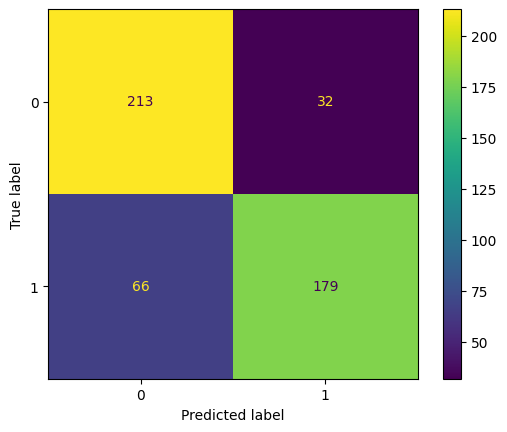

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# drawing confusion matrix
predictions = mod.predict(X_test)
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### Conclusion
Model might be done better with XGBoost model optimization or adding class_weights. The problem is having no knowledge of data environment
